# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

The chromedriver version (122.0.6261.94) detected in PATH at C:\Users\Amy\anaconda3\Scripts\chromedriver-win64\chromedriver-win64\chromedriver.exe might not be compatible with the detected chrome version (123.0.6312.58); currently, chromedriver 123.0.6312.58 is recommended for chrome 123.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

# Gather the html from the browser
html = browser.html

# BeautifulSoup parser
soup = BeautifulSoup(html, 'html.parser')

# Check type of parser object
print(type(soup))
print('-------------')

# Print parser to see html string
print(soup)

<class 'bs4.BeautifulSoup'>
-------------
<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<

In [ ]:
# This is the code that was attempted for using BeautifulSoup but did not work.

# Extract all rows of data

# # Find the table element
# table = soup.find('table')
# if table:

#     # Find all rows in the table
#     rows = table.find_all('tr')

#     # Store the table in a dictionary
#     mars_weather = {}

#     # Use for-loop to read each row and extract data
#     for row in rows:
#         row_heading = row.find('th')
#         row_data = row.find('td', class_= 'data-row')
    
#         if row_heading and row_data:
#             mars_weather[row_heading.text] = row_data
        
#     # Check if data was extracted (from Xpert Learning Assistant)
#     if mars_weather:
#         print(mars_weather)
#     else:
#         print('No data extracted')
        
# else:
#     print('Table not found')

# # Check that dictionary prints
# print(mars_weather)


In [5]:
# Extract all table data using Pandas, the Beautiful Soup method did not work (code is still included above, 
# but commented out).

# Read HTML table into a Pandas df. Use [0] to ensure the table is a table, and not a list. Display head to ensure it is
# read correctly.

weather_df = pd.read_html(url)[0]
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather = []

# Loop through the scraped data to create a list of rows
# Use iterrows() method
for index, row in weather_df.iterrows():
    
#     Make a dictionary for the current row. Create keys that coordinate with the df's column names
    row_data = {
        "ID": row['id'],
        "Terrestrial Date (Earth Days)": row['terrestrial_date'],
        "Sol (Martian Days)": row['sol'],
        "Solar Longitude": row['ls'],
        "Martian Month": row['month'],
        "Min Temp Cel": row['min_temp'],
        "Pressure": row['pressure']
    }
    
#     Append to mars_weather dictionary
    mars_weather.append(row_data)
mars_weather

[{'ID': 2,
  'Terrestrial Date (Earth Days)': '2012-08-16',
  'Sol (Martian Days)': 10,
  'Solar Longitude': 155,
  'Martian Month': 6,
  'Min Temp Cel': -75.0,
  'Pressure': 739.0},
 {'ID': 13,
  'Terrestrial Date (Earth Days)': '2012-08-17',
  'Sol (Martian Days)': 11,
  'Solar Longitude': 156,
  'Martian Month': 6,
  'Min Temp Cel': -76.0,
  'Pressure': 740.0},
 {'ID': 24,
  'Terrestrial Date (Earth Days)': '2012-08-18',
  'Sol (Martian Days)': 12,
  'Solar Longitude': 156,
  'Martian Month': 6,
  'Min Temp Cel': -76.0,
  'Pressure': 741.0},
 {'ID': 35,
  'Terrestrial Date (Earth Days)': '2012-08-19',
  'Sol (Martian Days)': 13,
  'Solar Longitude': 157,
  'Martian Month': 6,
  'Min Temp Cel': -74.0,
  'Pressure': 732.0},
 {'ID': 46,
  'Terrestrial Date (Earth Days)': '2012-08-20',
  'Sol (Martian Days)': 14,
  'Solar Longitude': 157,
  'Martian Month': 6,
  'Min Temp Cel': -74.0,
  'Pressure': 740.0},
 {'ID': 57,
  'Terrestrial Date (Earth Days)': '2012-08-21',
  'Sol (Martian Days

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Create the list of columns using the keys from the previous cell
columns = ['ID', 'Terrestrial Date (Earth Days)', 'Sol (Martian Days)', 'Solar Longitude', 'Martian Month', 'Min Temp Cel', 
           'Pressure']

# Use the list of rows from the previous cell, aka mars_weather
# Create the Pandas df
mars_weather_df = pd.DataFrame(mars_weather, columns = columns)



In [8]:
# Confirm DataFrame was created successfully
# Display the df head()
mars_weather_df

,ID,Terrestrial Date (Earth Days),Sol (Martian Days),Solar Longitude,Martian Month,Min Temp Cel,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1867 non-null   int64  
 1   Terrestrial Date (Earth Days)  1867 non-null   object 
 2   Sol (Martian Days)             1867 non-null   int64  
 3   Solar Longitude                1867 non-null   int64  
 4   Martian Month                  1867 non-null   int64  
 5   Min Temp Cel                   1867 non-null   float64
 6   Pressure                       1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis

# Change Terrestrial Date to datetime data type
mars_weather_df['Terrestrial Date (Earth Days)'] = pd.to_datetime(mars_weather_df['Terrestrial Date (Earth Days)'], 
                                                                  dayfirst=False)

mars_weather_df

,ID,Terrestrial Date (Earth Days),Sol (Martian Days),Solar Longitude,Martian Month,Min Temp Cel,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()
print('-------------------------------')
mars_weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             1867 non-null   int64         
 1   Terrestrial Date (Earth Days)  1867 non-null   datetime64[ns]
 2   Sol (Martian Days)             1867 non-null   int64         
 3   Solar Longitude                1867 non-null   int64         
 4   Martian Month                  1867 non-null   int64         
 5   Min Temp Cel                   1867 non-null   float64       
 6   Pressure                       1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB
-------------------------------


,ID,Terrestrial Date (Earth Days),Sol (Martian Days),Solar Longitude,Martian Month,Min Temp Cel,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

print(f'There are {mars_weather_df["Martian Month"].nunique()} months on Mars.')

There are 12 months on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?

print(f'There are {mars_weather_df["Sol (Martian Days)"].nunique()} Martian days worth of data in this data set.')

There are 1867 Martian days worth of data in this data set.


In [14]:
# 3. What is the average low temperature by month?

# Use .groupby() to group the average low temp by month
avg_temp = mars_weather_df.groupby("Martian Month")["Min Temp Cel"].mean()

print(avg_temp)

Martian Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min Temp Cel, dtype: float64


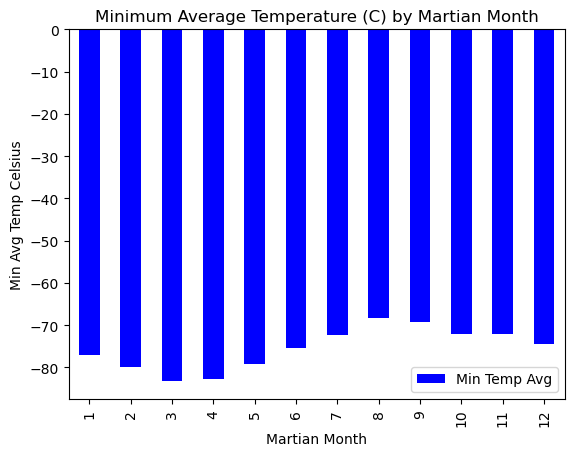

In [15]:
# Plot the average temperature by month

# Create simple df with avg temp by Martian month
avg_temp_df = avg_temp.reset_index()
avg_temp_df.rename(columns={'Min Temp Cel':'Min Temp Avg'}, inplace=True)

# Plot using a bar chart
avg_temp_df.plot(x='Martian Month', y='Min Temp Avg', kind='bar', color='blue')

# Add labels and title
plt.xlabel('Martian Month')
plt.ylabel('Min Avg Temp Celsius')
plt.title('Minimum Average Temperature (C) by Martian Month')

# Save the plot
plt.savefig('Mars_Weather_Results/min_avg_temp_by_month.png')

# Show the plot
plt.show()


In [16]:
# Identify the coldest and hottest months in Curiosity's location

# Group by 'Martian Month' and find the minimum and maximum 'Min Temp Avg'
coldest_month = avg_temp_df.groupby('Martian Month')['Min Temp Avg'].min()
hottest_month = avg_temp_df.groupby('Martian Month')['Min Temp Avg'].max()

# Find the coldest and hottest months using .idxmin() and .idxmax()
# .idxmin() and .idxmax() find the min and max temperature and returns the corresponding month for each
# From Xpert Learning Assistant
coldest = coldest_month.idxmin()
hottest = hottest_month.idxmax()

print("Coldest Month:", coldest)
print("Hottest Month:", hottest)

Coldest Month: 3
Hottest Month: 8


In [17]:
# 4. Average pressure by Martian month

# Use .groupby to help get the avg pressure by month
avg_pressure = mars_weather_df.groupby('Martian Month')['Pressure'].mean()

print(avg_pressure)

Martian Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64


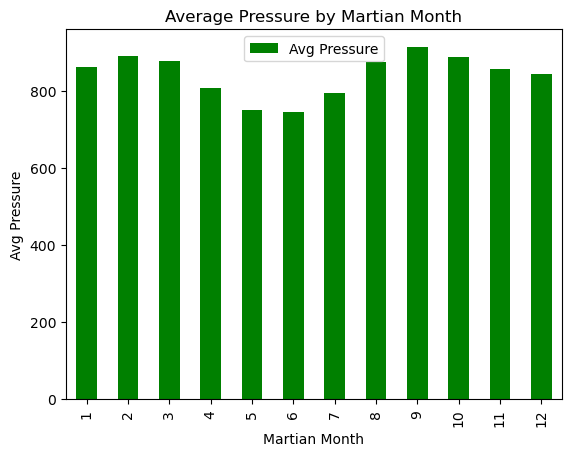

In [18]:
# Plot the average pressure by month

# Create simple df with avg temp by Martian month
avg_pressure_df =  avg_pressure.reset_index()
avg_pressure_df.rename(columns={'Pressure':'Avg Pressure'}, inplace=True)

# Plot using a bar chart
avg_pressure_df.plot(x='Martian Month', y='Avg Pressure', kind='bar', color='green')

# Add labels and title
plt.xlabel('Martian Month')
plt.ylabel('Avg Pressure')
plt.title('Average Pressure by Martian Month')

# Save the plot
plt.savefig('Mars_Weather_Results/avg_pressure_by_month.png')

# Show the plot
plt.show()



In [ ]:
# Use .groupby() to 
# sol_per_mmonth = mars_weather_df.groupby("Martian Month")["Sol (Martian Days)"].nunique()
# sol_per_mmonth

# Try mars_weather_df.groupby("Solar Longitude")["Martian Month"].value_counts() to see how many times
# month_counts = mars_weather_df.groupby("Solar Longitude")["Martian Month"].value_counts()
# month_counts

In [ ]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Using Xpert Learning Assistant
# Create variable for Earth day minutes and Sol minutes (earth day: 24(hours)*60 = 1440 minutes;
#     sol = 24 hours and 39 min = 24.65 hours * 60 = 1479 minutes)


# Calculate sol in a martian year


# Convert sol to earth days

# Calculate Martian year in earth days


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_weather_df.to_csv('Mars_Weather_Results/mars_weather_data.csv', index=False)

In [ ]:
browser.quit()